In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.subplot?

In [13]:
temp_df = pd.read_csv('temp_df - Copy.csv',   encoding='latin-1')
temp_df.head()

,name,year,runtime,certificate,genre,rating,url,movie_id,nudity,nudity_none,...,alcohol,alcohol_none,alcohol_mild,alcohol_moderate,alcohol_severe,frightening,frightening_none,frightening_mild,frightening_moderate,frightening_severe
0,Pulp Fiction,1994.0,154 min,R,"Crime, Drama",8.9,http://www.imdb.com/title/tt0110912/,tt0110912,Moderate,0,...,Severe,0,0,2,22,Severe,0,3,5,15
1,The Amazing Spider-Man 2,2014.0,142 min,PG-13,"Action, Adventure, Sci-Fi",6.7,http://www.imdb.com/title/tt1872181/,tt1872181,Mild,0,...,Mild,0,2,0,0,Moderate,0,0,2,0
2,The Shawshank Redemption,1994.0,142 min,R,"Crime, Drama",9.3,http://www.imdb.com/title/tt0111161/,tt0111161,Moderate,1,...,Mild,0,9,0,0,Moderate,1,2,5,1
3,Star Wars: Episode IV - A New Hope,1977.0,121 min,PG,"Action, Adventure, Fantasy",8.7,http://www.imdb.com/title/tt0076759/,tt0076759,None,13,...,Mild,2,11,0,0,Mild,0,11,3,0
4,Back to the Future,1985.0,116 min,PG,"Adventure, Comedy, Sci-Fi",8.5,http://www.imdb.com/title/tt0088763/,tt0088763,Mild,0,...,Mild,0,5,0,0,Mild,0,5,0,0


In [15]:
pivot_df=temp_df.pivot_table(values='name', index='year', columns='certificate', aggfunc=np.count_nonzero)
# pivot_df[np.isnan(p_df)] = 0
pivot_df = pivot_df.fillna(0)
pivot_df.head()

certificate,G,NC-17,PG,PG-13,R
year,,,,,
1970.0,1.0,0.0,4.0,0.0,5.0
1971.0,1.0,0.0,0.0,0.0,2.0
1972.0,3.0,1.0,29.0,0.0,19.0
1973.0,15.0,1.0,63.0,0.0,65.0
1974.0,11.0,2.0,49.0,1.0,55.0


In [17]:
print(type(pivot_df.index))
pivot_df.index = pivot_df.index.map(int)
pivot_df[['R', 'PG-13', 'PG', 'G', 'NC-17']] = pivot_df[['R', 'PG-13', 'PG', 'G', 'NC-17']].astype(int)
pivot_df.head()

<class 'pandas.indexes.numeric.Int64Index'>


certificate,G,NC-17,PG,PG-13,R
1970,1,0,4,0,5
1971,1,0,0,0,2
1972,3,1,29,0,19
1973,15,1,63,0,65
1974,11,2,49,1,55


In [18]:
pivot_df.sum()

certificate
G         277
NC-17      21
PG       1695
PG-13    2116
R        4279
dtype: int64

In [19]:
(pivot_df.sum()).sum()

8388

In [20]:
import seaborn as sns

<IPython.core.display.Javascript object>


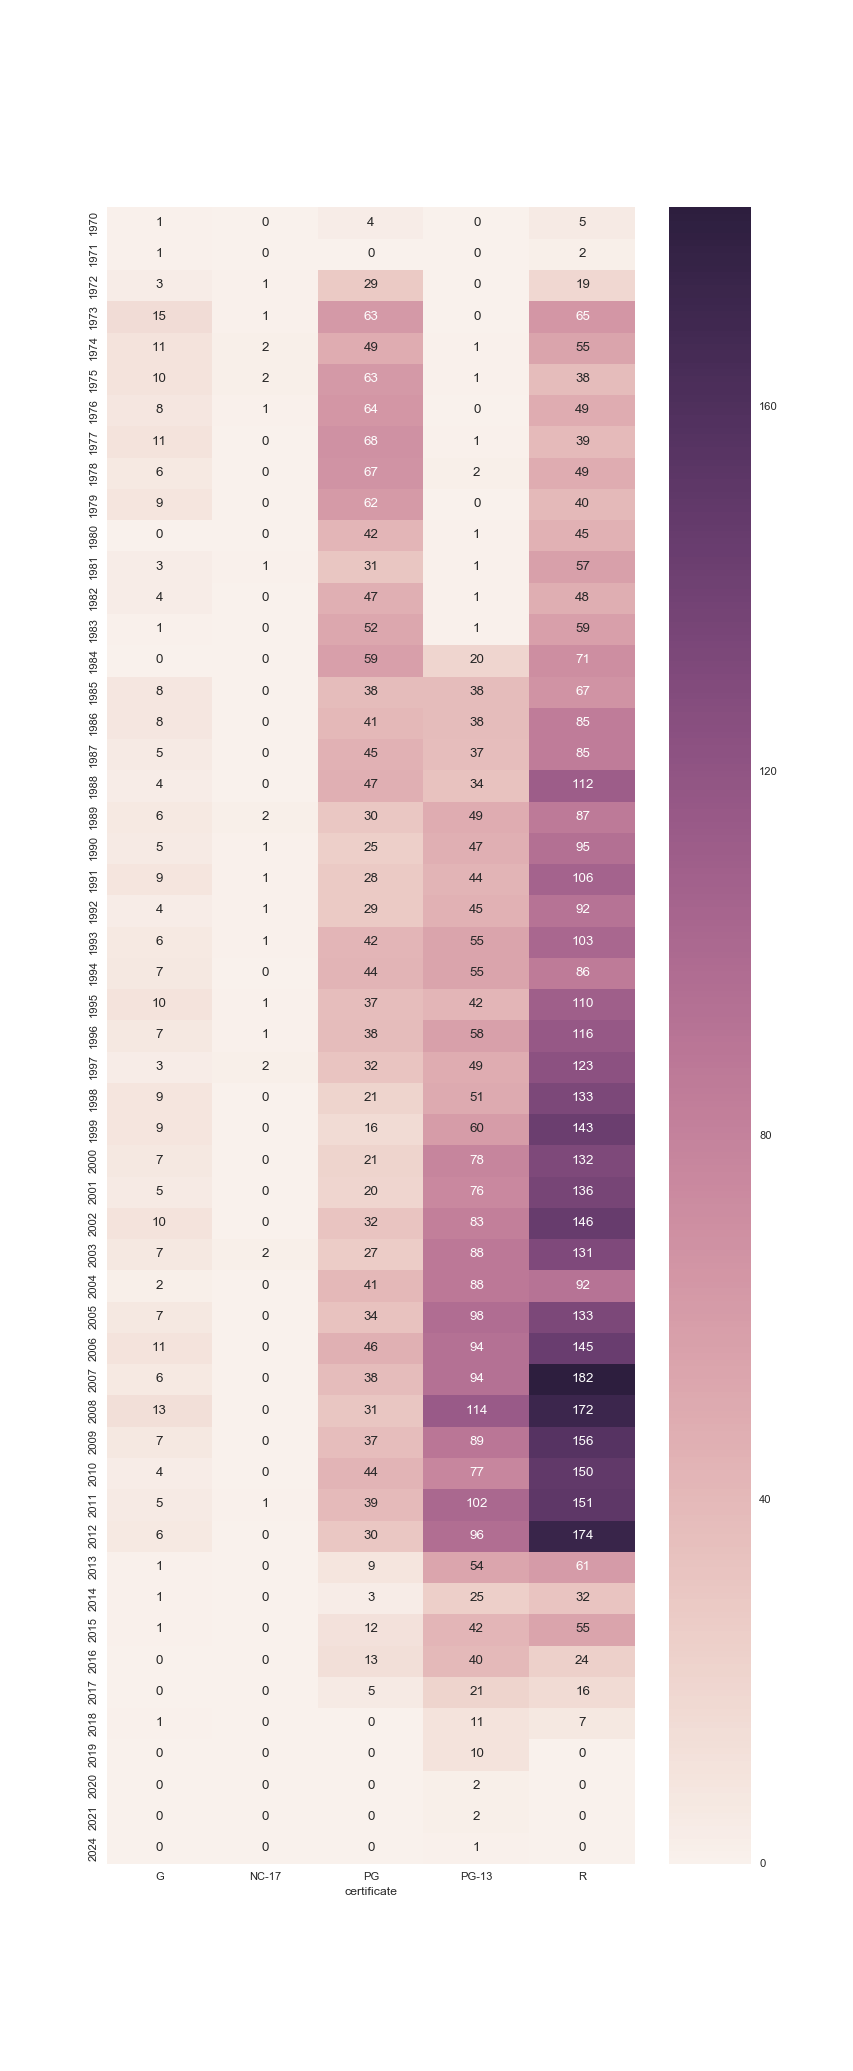

In [21]:
sns.heatmap(pivot_df,annot=True,fmt='d')

<IPython.core.display.Javascript object>


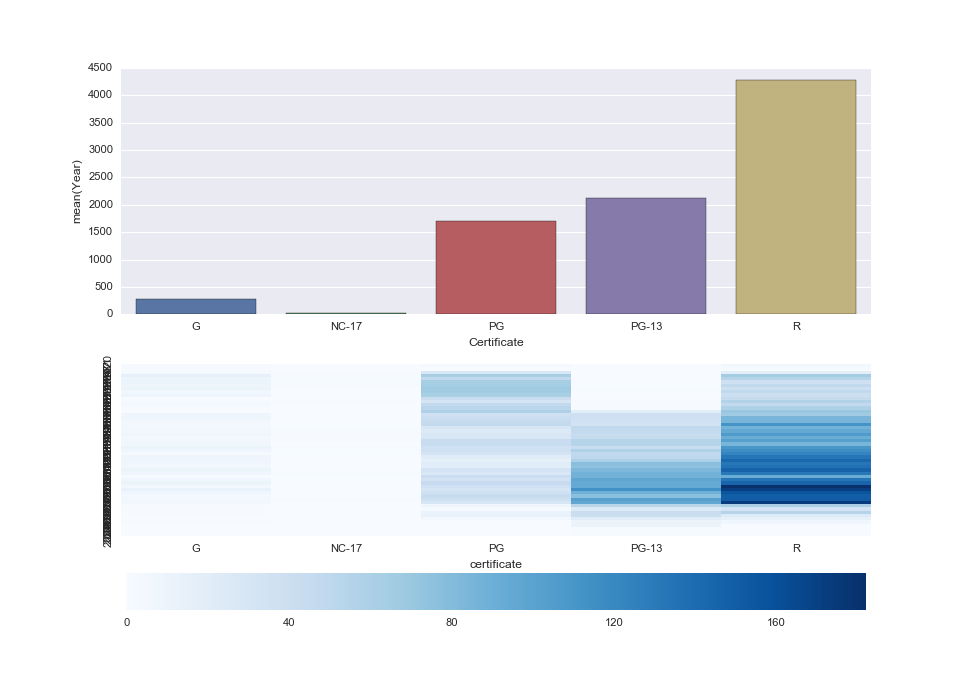

In [22]:
fig,(axis1,axis2)=plt.subplots(2,1)

cer_mov=pivot_df.sum()
cer=pd.Series(cer_mov.index.values)
cer=pd.DataFrame(cer)

mov=pd.Series(cer_mov.values)
mov=pd.DataFrame(mov)

cer_dataframe= pd.concat((cer,mov),axis1)
cer_dataframe.columns=['Certificate','Year']

sns.barplot('Certificate',y='Year', data=cer_dataframe,ax=axis1)
sns.heatmap(pivot_df,cmap='Blues', ax=axis2,cbar_kws={'orientation':'horizontal'})

# Modeling 

In [79]:
temp_df
temp_df.dtypes
df= temp_df[['nudity','violence','profanity','alcohol','frightening','name','certificate']]
df.head()

,nudity,violence,profanity,alcohol,frightening,name,certificate
0,Moderate,Severe,Severe,Severe,Severe,Pulp Fiction,R
1,Mild,Moderate,Be the first to evaluate this category,Mild,Moderate,The Amazing Spider-Man 2,PG-13
2,Moderate,Moderate,Severe,Mild,Moderate,The Shawshank Redemption,R
3,None,Mild,Mild,Mild,Mild,Star Wars: Episode IV - A New Hope,PG
4,Mild,Mild,Mild,Mild,Mild,Back to the Future,PG


### there are few catogries where we do not have any rating or classification 

In [80]:
print(df.certificate.unique())
print(df.nudity.unique())
print(df.violence.unique())
print(df.profanity.unique())
print(df.alcohol.unique())
print(df.frightening.unique())


['R' 'PG-13' 'PG' 'G' 'NC-17']
['Moderate' 'Mild' 'None' 'Severe' 'Be the first to evaluate this category']
['Severe' 'Moderate' 'Mild' 'Be the first to evaluate this category' 'None']
['Severe' 'Be the first to evaluate this category' 'Mild' 'Moderate' 'None']
['Severe' 'Mild' 'Moderate' 'None' 'Be the first to evaluate this category']
['Severe' 'Moderate' 'Mild' 'None' 'Be the first to evaluate this category']


### change Be the first to evaluate this category to None

In [81]:
df=df.replace(['Be the first to evaluate this category'], 'NotGiven')

In [75]:
print(df.certificate.unique())
print(df.nudity.unique())
print(df.violence.unique())
print(df.profanity.unique())
print(df.alcohol.unique())
print(df.frightening.unique())

['R' 'PG-13' 'PG' 'G' 'NC-17']
['Moderate' 'Mild' 'None' 'Severe' 'NotGiven']
['Severe' 'Moderate' 'Mild' 'NotGiven' 'None']
['Severe' 'NotGiven' 'Mild' 'Moderate' 'None']
['Severe' 'Mild' 'Moderate' 'None' 'NotGiven']
['Severe' 'Moderate' 'Mild' 'None' 'NotGiven']


In [82]:
df.head()

,nudity,violence,profanity,alcohol,frightening,name,certificate
0,Moderate,Severe,Severe,Severe,Severe,Pulp Fiction,R
1,Mild,Moderate,NotGiven,Mild,Moderate,The Amazing Spider-Man 2,PG-13
2,Moderate,Moderate,Severe,Mild,Moderate,The Shawshank Redemption,R
3,None,Mild,Mild,Mild,Mild,Star Wars: Episode IV - A New Hope,PG
4,Mild,Mild,Mild,Mild,Mild,Back to the Future,PG


In [87]:
tempdf=df.loc[df['nudity'].isin(['NotGiven'])]

tempdf

,nudity,violence,profanity,alcohol,frightening,name,certificate
22,NotGiven,NotGiven,NotGiven,NotGiven,NotGiven,xXx,PG-13
39,NotGiven,NotGiven,NotGiven,NotGiven,NotGiven,G.I. Joe: The Rise of Cobra,PG-13
50,NotGiven,NotGiven,NotGiven,NotGiven,NotGiven,Grown Ups,PG-13
55,NotGiven,NotGiven,NotGiven,NotGiven,NotGiven,RED,PG-13
62,NotGiven,NotGiven,NotGiven,NotGiven,NotGiven,Limitless,PG-13
67,NotGiven,NotGiven,NotGiven,NotGiven,NotGiven,In Time,PG-13
72,NotGiven,NotGiven,NotGiven,NotGiven,NotGiven,Battleship,PG-13
73,NotGiven,NotGiven,NotGiven,NotGiven,NotGiven,The Bourne Legacy,PG-13
76,NotGiven,NotGiven,NotGiven,NotGiven,NotGiven,The Campaign,R
85,NotGiven,NotGiven,NotGiven,NotGiven,NotGiven,The Guilt Trip,PG-13


In [83]:
df.to_csv('tool_modeling_input.csv',index=False)

### Assigning original dataframe to two variable for two differnt approach

* Will be removed later

# CART - Classification and Regression Trees

* Note: Decision Trees does not support missing values.

We have lot of cell values where user review is required. 
It need further analysis to fit a model

# Simple linear regression is not appropriate too

In [50]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

number = LabelEncoder()
df1['nudity']=number.fit_transform(df1['nudity'].astype('str'))
df1['violence']=number.fit_transform(df1['violence'].astype('str'))
df1['profanity']=number.fit_transform(df1['profanity'].astype('str'))
df1['alcohol']=number.fit_transform(df1['alcohol'].astype('str'))
df1['frightening']=number.fit_transform(df1['frightening'].astype('str'))
df1['certificate']=number.fit_transform(df1['certificate'].astype('str'))
df1.head()



,nudity,violence,profanity,alcohol,frightening,name,certificate
0,1,3,3,3,3,Pulp Fiction,4
1,0,1,2,0,1,The Amazing Spider-Man 2,3
2,1,1,3,0,1,The Shawshank Redemption,4
3,2,0,0,0,0,Star Wars: Episode IV - A New Hope,2
4,0,0,0,0,0,Back to the Future,2


In [51]:
X = df1.iloc[:, :-2].values
y = df1.iloc[:, 4].values

array([3, 1, 1, ..., 2, 3, 2], dtype=int64)

In [53]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [55]:
y_pred

array([ 2.,  2.,  2., ...,  2.,  2.,  2.])